In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [170]:
diabetes = pd.read_csv('C:/Users/jycha/Downloads/diabetes.csv')

In [171]:
diabetes.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [172]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [173]:
df = pd.DataFrame(data=diabetes, columns=diabetes.columns)

In [174]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [175]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [176]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [177]:
df.shape

(768, 9)

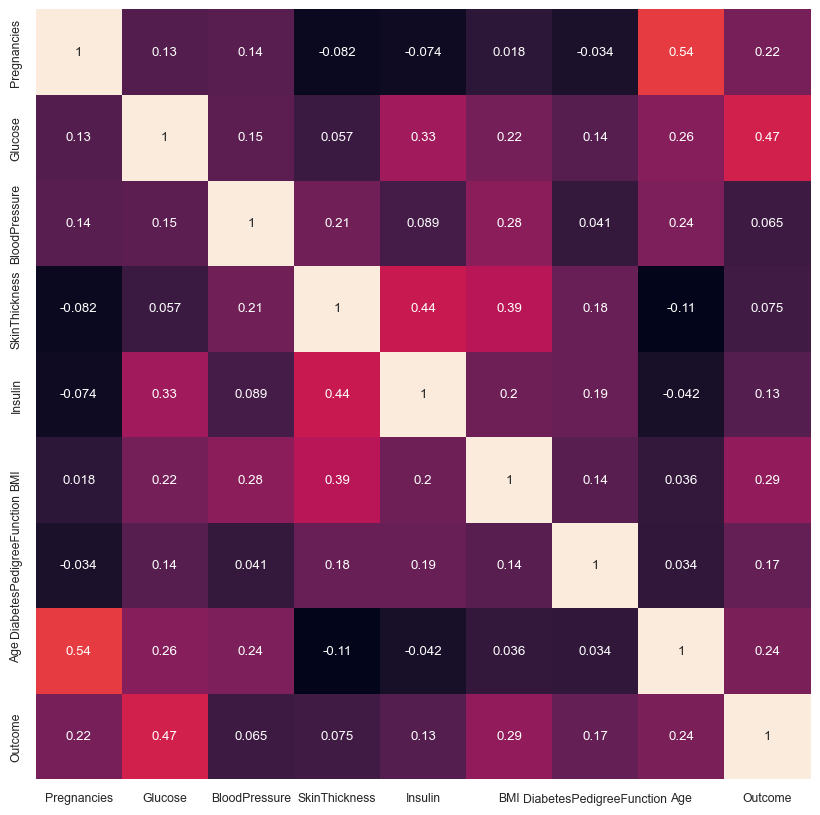

In [178]:
# Heatmap

df_corr=df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [179]:
x_data=df.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_data=df.loc[:, ['Outcome']]

In [180]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [181]:
y_data.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(576, 8) (576, 1)
(192, 8) (192, 1)


In [183]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7291666666666666
[[106  17]
 [ 35  34]]


In [184]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.6875
[[86 37]
 [23 46]]


In [185]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.75
[[99 24]
 [24 45]]


In [186]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7291666666666666
[[95 28]
 [24 45]]


In [187]:
df2 = df.copy()
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [199]:
x=df2.loc[:, ['BMI']]
x.head()

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1


In [200]:
y=df2.loc[:, ['Glucose']]
y.head()

,Glucose
0,148
1,85
2,183
3,89
4,137


In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(576, 1) (576, 1)
(192, 1) (192, 1)


In [202]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [204]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [[0.9]]
상수항(절편): [92.3]


In [205]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(576, 1) (192, 1)


In [206]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 928.749, RMSE: 30.475
Variance score : 0.063


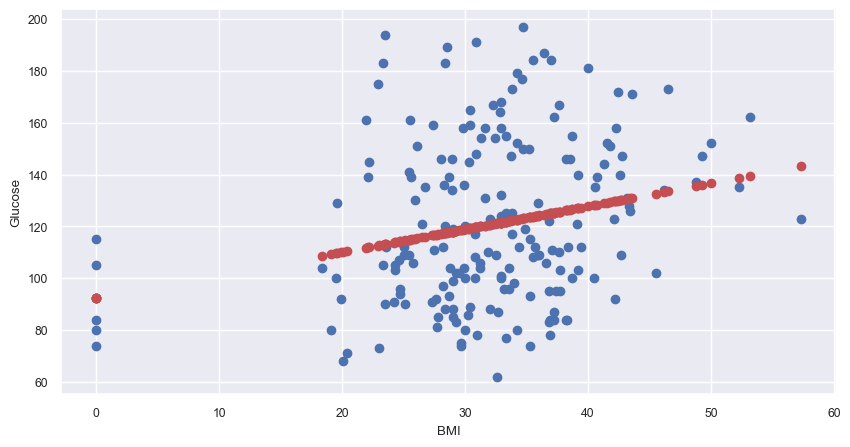

In [210]:
plt.figure(figsize=(10,5))
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], y_preds, c='r', label='y_preds')
plt.show()

In [212]:
# SVR

from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 31.57382942251457


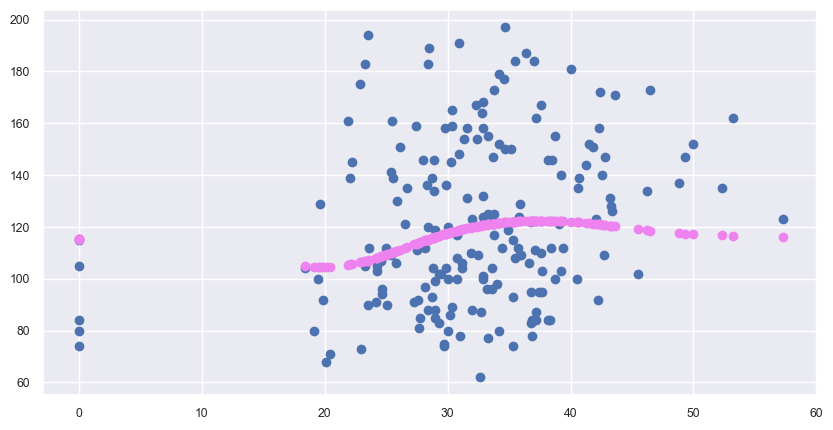

In [213]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], sy_preds, c='violet', label='sy_preds')
plt.show()

In [214]:
# DT

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 36.28639375299131


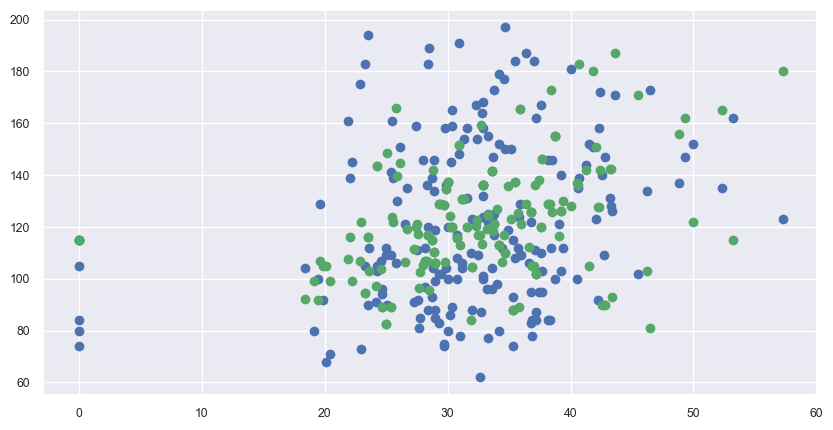

In [215]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], dy_preds, c='g', label='dy_preds')
plt.show() 

In [216]:
# RT

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 34.61580616630208


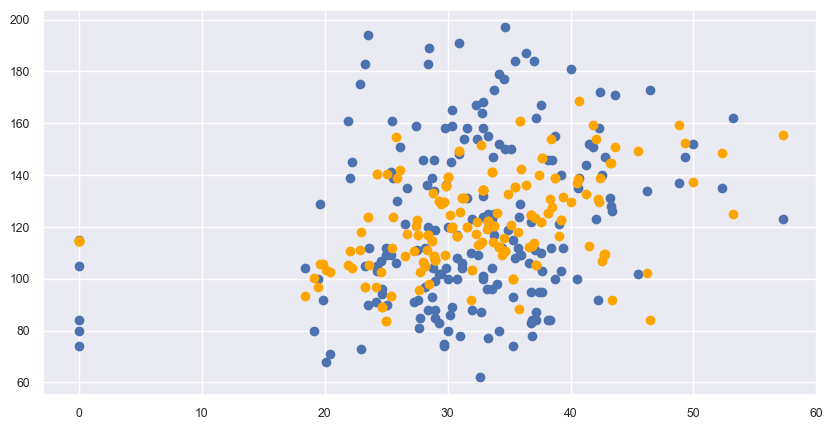

In [217]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], ry_preds, c='orange', label='ry_preds')
plt.show() 

In [218]:
# LR

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 30.475375479523176


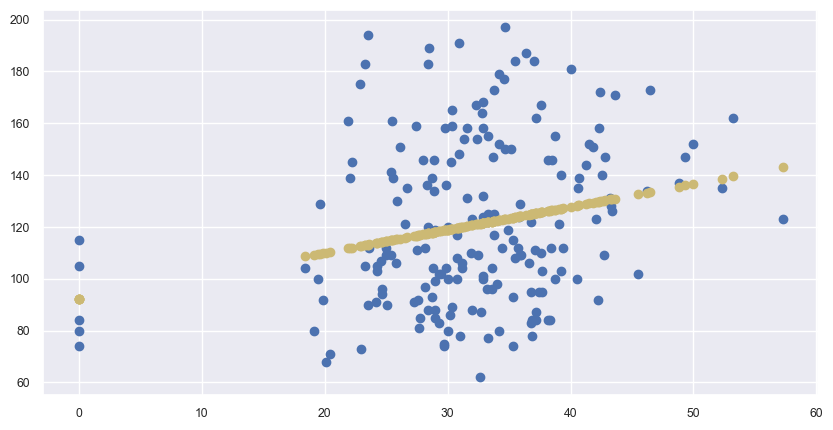

In [219]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], ly_preds, c='y', label='ly_preds')
plt.show()